In [ ]:
import numpy as np # linear algebra  (Converting the dataset into 1D array data)
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #for formatting the graphs that we have plotted 
import matplotlib.pyplot as plt #importing the graphs for visualization 

In [ ]:
#Reading the dataset 
df=pd.read_csv('/content/Dataset For Landslide.csv')  # Along with the file directory
#reading the info for the dataset 
df.info()  # Prints the concise summary of the dataframe 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693 entries, 0 to 1692
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1693 non-null   int64  
 1   date                  1690 non-null   object 
 2   time                  629 non-null    object 
 3   continent_code        164 non-null    object 
 4   country_name          1693 non-null   object 
 5   country_code          1693 non-null   object 
 6   state/province        1692 non-null   object 
 7   population            1693 non-null   int64  
 8   city/town             1689 non-null   object 
 9   distance              1692 non-null   float64
 10  location_description  551 non-null    object 
 11  latitude              1692 non-null   float64
 12  longitude             1692 non-null   float64
 13  geolocation           1692 non-null   object 
 14  hazard_type           1693 non-null   object 
 15  landslide_type       

In [ ]:
features=df.columns.values

missing_val=df.isnull().sum()     #returns the number of missing values in the data set.
non_missing_val= df.notnull().sum()   # returns the number of non-missing values in the data set.
total_val=df.shape[0]    # stores the number of rows and columns as a tuple (number of rows, number of columns)

percentage_missing=missing_val/total_val*100    # finding the total percentage of missing dataset
percentage_missing

id                       0.000000
date                     0.177200
time                    62.847017
continent_code          90.313054
country_name             0.000000
country_code             0.000000
state/province           0.059067
population               0.000000
city/town                0.236267
distance                 0.059067
location_description    67.454223
latitude                 0.059067
longitude                0.059067
geolocation              0.059067
hazard_type              0.000000
landslide_type           0.059067
landslide_size           0.059067
trigger                  0.118133
storm_name              92.203190
injuries                69.580626
fatalities              14.589486
source_name             48.493798
source_link              5.906675
dtype: float64

In [ ]:
#convert date object to datetime
df['date_parsed']=pd.to_datetime(df['date'], format="%m/%d/%y",errors='coerce')
#convert date object to datetime
df[df.date_parsed.isnull()] #inspect null values 

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link,date_parsed
1482,7042,NaN,Morning,NaN,United States,US,Kansas,857,Oregon,14.54524,...,Landslide,Mudslide,Small,Downpour,NaN,0.0,0.0,KSNT,http://ksnt.com/2015/05/26/update-flooded-road...,NaT
1497,7080,NaN,13:00,NaN,United States,US,Ohio,4113,Chagrin Falls,0.71363,...,Landslide,Landslide,Small,Unknown,NaN,0.0,0.0,Cleveland,http://www.cleveland.com/chagrin-falls/index.s...,NaT
1526,7165,NaN,12:15,NaN,United States,US,Indiana,2085,Rockport,8.43158,...,Landslide,Landslide,Small,Rain,NaN,0.0,0.0,WTHITV10,http://wthitv.com/2015/04/09/parke-county-sher...,NaT


In [ ]:
df.dropna(subset=['date_parsed'], how='any', inplace=True)  # Dropna method will modify the dataset directly
df.info() #inspect df again 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 0 to 1692
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    1690 non-null   int64         
 1   date                  1690 non-null   object        
 2   time                  626 non-null    object        
 3   continent_code        164 non-null    object        
 4   country_name          1690 non-null   object        
 5   country_code          1690 non-null   object        
 6   state/province        1689 non-null   object        
 7   population            1690 non-null   int64         
 8   city/town             1686 non-null   object        
 9   distance              1689 non-null   float64       
 10  location_description  548 non-null    object        
 11  latitude              1689 non-null   float64       
 12  longitude             1689 non-null   float64       
 13  geolocation       

In [ ]:
df['day']=df['date_parsed'].dt.day_name()  #convert date to a day of the week
df['month']=df['date_parsed'].dt.month_name() #convert date to month of a week

Text(0.5, 1.0, 'Days of the week from year 2007 to 2016')

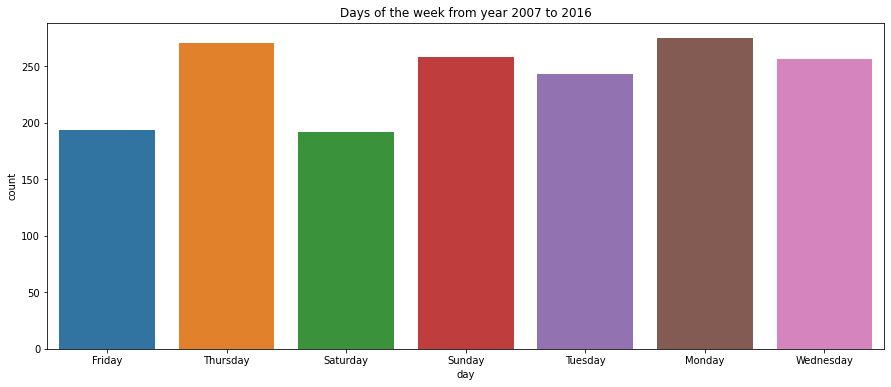

In [ ]:
plt.figure(figsize=(15,6)) 
sns.countplot(x=df['day'])   # show the count of the observation
plt.title('Days of the week from year 2007 to 2016')

Text(0.5, 1.0, 'Landslides across month from the year 2007 to 2016')

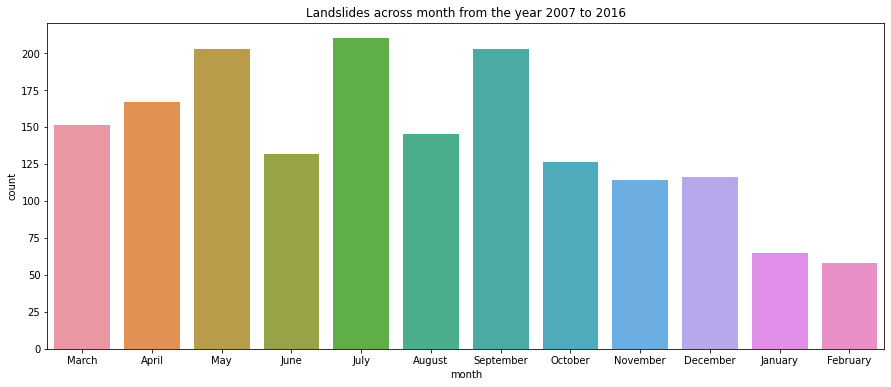

In [ ]:
plt.figure(figsize=(15,6))     #Plotting Function
sns.countplot(x=df['month']) #Show the count of the Observation
plt.title('Landslides across month from the year 2007 to 2016')